In [42]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [24]:
nx.__version__

'1.11'

####Using http://networkx.readthedocs.io/en/networkx-1.11/tutorial/ as a reference

In [2]:
M=nx.read_gml("polblogs.gml")

In [3]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)

In [45]:
#looking at a few nodes
nodes = pd.DataFrame(G.nodes())
nodes.head()

,0
0,tsrightdominion.blogspot.com
1,rightrainbow.com
2,truebluegal.blogspot.com
3,newleftblogs.blogspot.com
4,stitt.blogspot.com


In [46]:
#Looking at a few edges
edges = pd.DataFrame(G.edges())
edges.head()

,0,1
0,tsrightdominion.blogspot.com,democraticunderground.com
1,tsrightdominion.blogspot.com,conservativepunk.com
2,tsrightdominion.blogspot.com,anncoulter.org
3,tsrightdominion.blogspot.com,aldaynet.org
4,tsrightdominion.blogspot.com,gevkaffeegal.typepad.com/the_alliance


In [47]:
#Looking at neighbors of one node
G.neighbors('tsrightdominion.blogspot.com')

[u'democraticunderground.com',
 u'conservativepunk.com',
 u'anncoulter.org',
 u'aldaynet.org',
 u'gevkaffeegal.typepad.com/the_alliance',
 u'coxandforkum.com',
 u'wonkette.com',
 u'hughhewitt.com',
 u'blogsforbush.com',
 u'drudgereport.com',
 u'blogsagainsthillary.com',
 u'californiaconservatives4truth.blogspot.com',
 u'rightwingnews.com',
 u'scrappleface.com',
 u'michellemalkin.com',
 u'americandinosaur.blogspot.com',
 u'madtechspeaks.blogspot.com',
 u'dissectleft.blogspot.com',
 u'freerepublic.com',
 u'dailykos.com',
 u'legendgames.net/myblog.asp']

### 1.  Create a nice looking graph of the political blog network

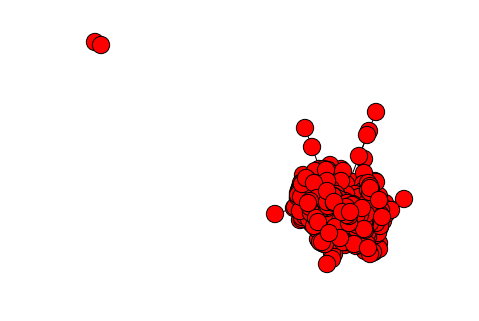

In [14]:
#An ugly graph
nx.draw(G)

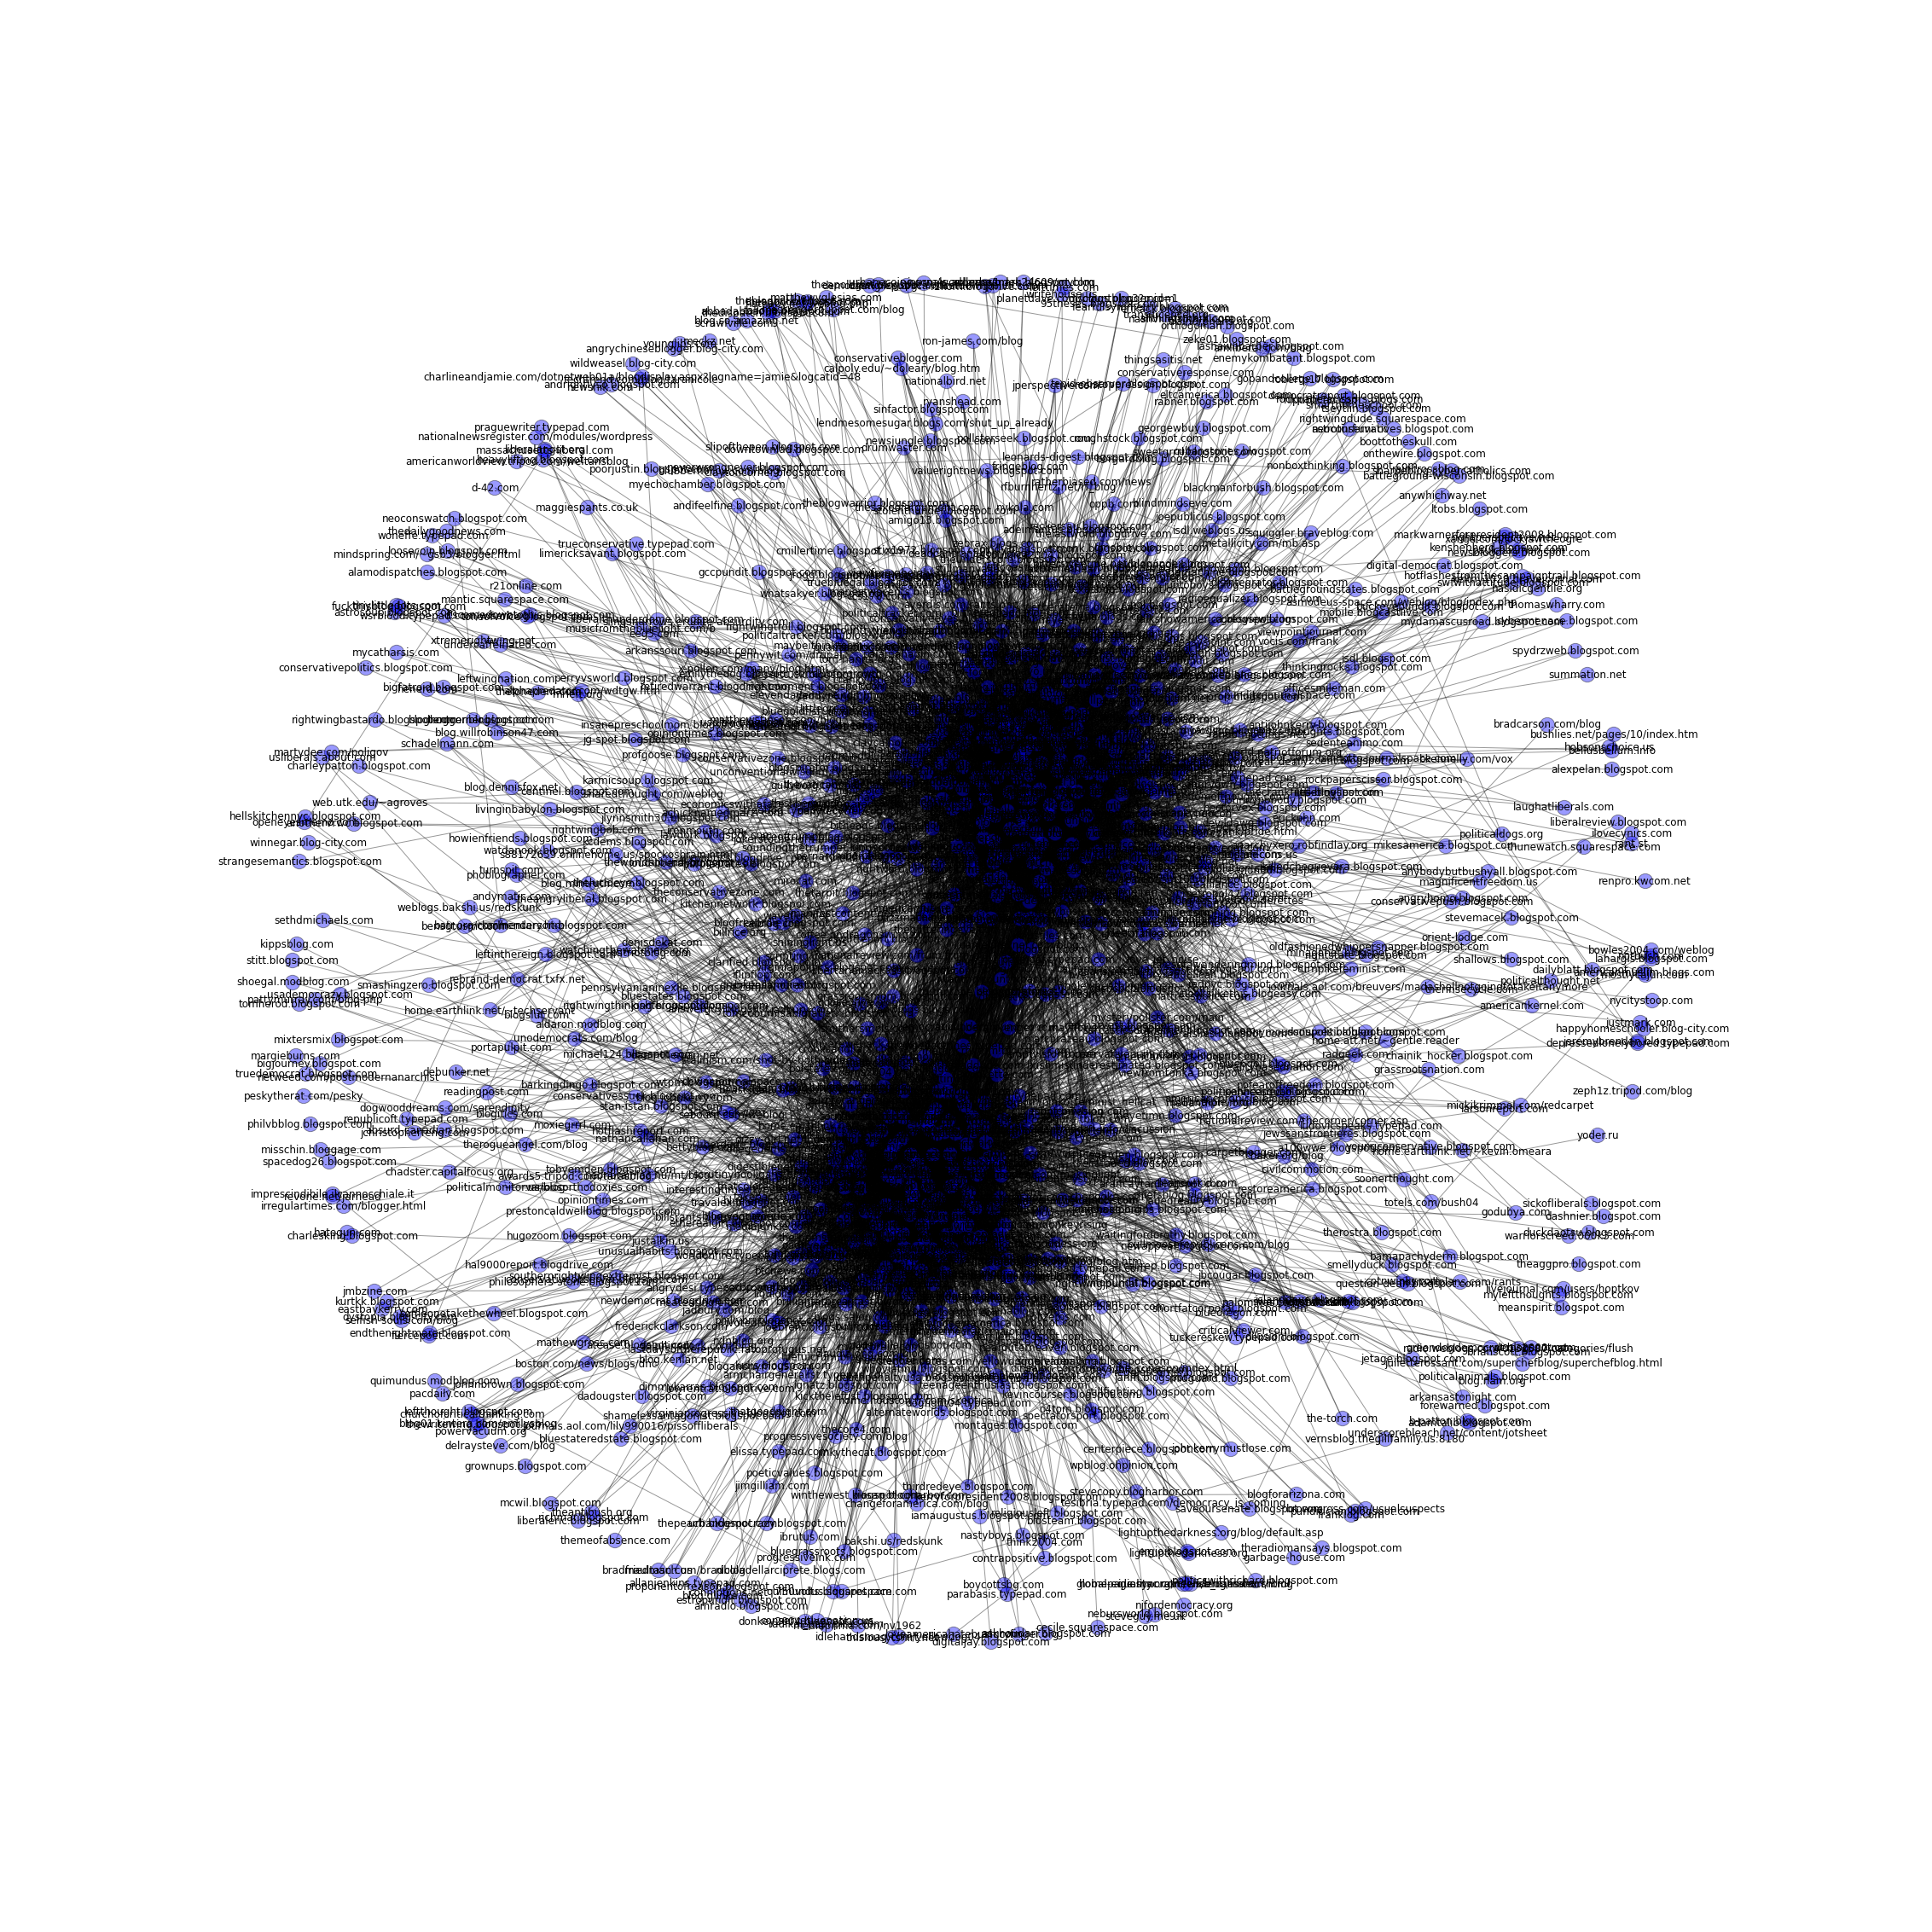

In [68]:
#prettier
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=3)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

### 2.  What are the 10 most influential blogs?

In [48]:
#Getting the centrality for G, using code from: 
#https://github.com/mbernico/CS570/blob/master/Boston%20-%201776.ipynb
centrality=nx.eigenvector_centrality(G)

In [49]:
#Getting centrality per node, using code from same
person_list = []
for node in centrality:
    person_list.append((node,centrality[node]))
    
sorted_person_list = person_list.sort(key=lambda x: x[1])

In [57]:
#Creating a dataframe to easily tell top and last 10
sorted_person_df = pd.DataFrame(sorted(person_list, key=lambda x: x[1], reverse=True))
sorted_person_df.columns = ['blog', 'ec']

In [58]:
#Since the dataframe is sorted by the centrality in 
#descending order, the first ten are the most influential
sorted_person_df.head(10)

,blog,ec
0,atrios.blogspot.com,0.194808
1,dailykos.com,0.160897
2,washingtonmonthly.com,0.146539
3,digbysblog.blogspot.com,0.142644
4,bodyandsoul.typepad.com,0.141135
5,liberaloasis.com,0.139524
6,tbogg.blogspot.com,0.137036
7,corrente.blogspot.com,0.129418
8,talkingpointsmemo.com,0.127005
9,dneiwert.blogspot.com,0.122376


### 3.  What are the 10 least influential blogs?

In [59]:
#Since the dataframe is sorted by the centrality in 
#descending order, the last ten are the least influential
sorted_person_df.tail(10)

,blog,ec
1214,thingsasitis.net,1.173625e-05
1215,massachusetts-liberal.com,9.483365e-06
1216,quimundus.squarespace.com,6.061741e-06
1217,democratvoice.org,1.023339e-06
1218,batr.net,6.796326e-07
1219,batr.org/commentary.html,6.795518e-07
1220,quimundus.modblog.com,6.682930e-08
1221,americanworldview.tripod.com/weltansblog,7.491541e-09
1222,thelonedem.com,1.776325e-72
1223,digital-democrat.blogspot.com,1.776325e-72


That's sad; the lone dem really is almost all alone

###4. Answer this question for both left wing and right wing blogs seperately. (Optional 10 Extra Credit Points)